In [1]:
from RCN import *
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# calibrated parameters from part_4.ipynb
r = -0.007801729853464256
delta = 0.02720239796079839
U = 1.054699999999994
D = 0.9440001342869291

### 1)
#### i)

In [3]:
payment_dates = np.arange(1,13)
period_length = 1/12
coupon_rate = 0.10
initial_price = 11118
exercise_price = 1

In [4]:
rcn1 = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, exercise_price, Simple=True, Callable=False, barrier_level=None)

In [5]:
rcn1.price_RCN()

1.0124083511877382

#### ii)

In [6]:
barrier_level = 0.8
rcn2 = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)

In [7]:
rcn2.set_barrier()
rcn2.price_RCN()

1.0544990135271406

### 2)

In [8]:
par_rate1 = 0
rcn1_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate1, exercise_price, Simple=True, Callable=False, barrier_level=None)
while np.abs(rcn1_par.price_RCN() - 1) > .001:
    par_rate1 += .001
    rcn1_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                           payment_dates, par_rate1, exercise_price, Simple=True, Callable=False, barrier_level=None)

In [9]:
par_rate1

0.08700000000000006

In [10]:
round(rcn1_par.price_RCN(),2)

1.0

In [11]:
par_rate2 = 0
rcn2_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate2, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)
rcn2_par.set_barrier()
while np.abs(rcn2_par.price_RCN() - 1) > .001:
    par_rate2 += .001
    rcn2_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate2, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)
    rcn2_par.set_barrier()

In [12]:
par_rate2

0.04500000000000003

In [13]:
round(rcn2_par.price_RCN(),2)

1.0

In [14]:
barrier_levels = np.arange(.4,1.2,.2)
strikes = np.linspace(.5,1.5)

In [15]:
par_simple = []
par_barrier = {}

In [16]:
for s in strikes:
    par = -.10
    simple = RCN_binomial(r, period_length, initial_price, delta, U, D,
                          payment_dates, par, s, Simple=True, Callable=False, barrier_level=None)
    while np.abs(simple.price_RCN() - 1) > .001:
        par += .001
        simple = RCN_binomial(r, period_length, initial_price, delta, U, D,
                              payment_dates, par, s, Simple=True, Callable=False, barrier_level=None)
    par_simple.append(par)

In [17]:
"""
for b in barrier_levels:
    for s in strikes:
        print(b,s)
        par = -.10
        barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,
                  payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)
        barrier.set_barrier()
        while np.abs(barrier.price_RCN() - 1) > .001:
            par += .001
            barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,
                      payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)
            barrier.set_barrier()
        if s == strikes[0]:
            par_barrier[b] = [par]
        else:
            par_barrier[b].append(par)
"""

'\nfor b in barrier_levels:\n    for s in strikes:\n        print(b,s)\n        par = -.10\n        barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,\n                  payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)\n        barrier.set_barrier()\n        while np.abs(barrier.price_RCN() - 1) > .001:\n            par += .001\n            barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,\n                      payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)\n            barrier.set_barrier()\n        if s == strikes[0]:\n            par_barrier[b] = [par]\n        else:\n            par_barrier[b].append(par)\n'

In [18]:
# block above takes more time to execute, save output to avoid running again
"""
with open('par_barrier.json', 'w') as f:
    json.dump(par_barrier, f)
"""
f = open('par_barrier.json',)
par_barrier = json.load(f)

In [19]:
tick_loc = list(range(0,len(strikes)+1,9))
tick_lab = [round(strikes[i],2) for i in tick_loc]

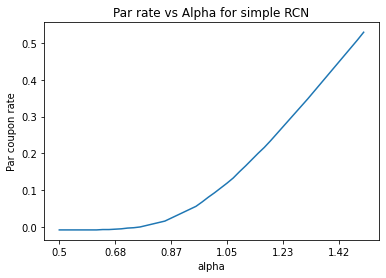

In [44]:
fig, ax = plt.subplots()
plt.plot(par_simple)
ax.set_xticks(tick_loc);
ax.set_xticklabels(tick_lab);
plt.xlabel('alpha');
plt.ylabel('Par coupon rate');
plt.title('Par rate vs Alpha for simple RCN');

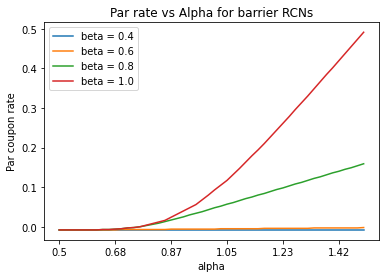

In [43]:
fig, ax = plt.subplots()
for i in range(len(par_barrier)):
    ax.plot(par_barrier[str(barrier_levels[i])], label = 'beta = '+str(round(barrier_levels[i],2)))
plt.legend()
ax.set_xticks(tick_loc);
ax.set_xticklabels(tick_lab);
plt.xlabel('alpha');
plt.ylabel('Par coupon rate');
plt.title('Par rate vs Alpha for barrier RCNs');

### 3)

In [59]:
a1 = 0
rcn1_apar = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, a1, Simple=True, Callable=False, barrier_level=None)
while np.abs(rcn1_apar.price_RCN() - 1) > .0001:
    a1 += .001
    rcn1_apar = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, a1, Simple=True, Callable=False, barrier_level=None)

In [60]:
rcn1_apar.price_RCN()

1.000056500948266

In [78]:
c_rates = np.linspace(0,.2,100)
a_pars = []
for c in c_rates:
    print(c)
    a_par = 0
    rcn1_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, c, a_par, Simple=True, Callable=False, barrier_level=None)
    e = (rcn1_apar_c.price_RCN()-1)**2
    while e > .0001:
        a_par += .001
        rcn1_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, c, a_par, Simple=True, Callable=False, barrier_level=None)
    a_pars.append(a_par)

0.0
0.00202020202020202
0.00404040404040404
0.006060606060606061
0.00808080808080808
0.0101010101010101
0.012121212121212121
0.014141414141414142
0.01616161616161616
0.01818181818181818


KeyboardInterrupt: 

In [74]:
a_par = .9
rcn1_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, 0.018090452261306535, a_par, Simple=True, Callable=False, barrier_level=None)

In [75]:
rcn1_apar_c.price_RCN()

0.9810127196309063